# Error Analysis

In [2]:
import solver
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

Scenario 1: Cratering
r=10m
v0=21000m/s
rho=3000kg/m3
angle= 45 degrees (fiducial scenario)

In [24]:
comparison_crater = solver.Planet(atmos_func='exponential',atmos_filename="../data/AltitudeDensityTable.csv",
                                  Cd=1., Ch=0, Q=2, Cl=0, alpha=0, Rp=np.inf, g=0, H=8000., rho0=1.2)
df_cratering = comparison_crater.solve_atmospheric_entry(radius=10, velocity=21000, density=3000, strength=1e6, angle=45,
                               init_altitude=100e3, dt=0.01, radians=False)
df_cratering2 = comparison_crater.calculate_energy(df_cratering)
df_cratering2

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,21000.000000,1.256637e+07,45.0,100000.000000,0.000000,10.0,0.00,0.000106
1,20999.999751,1.256637e+07,45.0,99851.507577,148.492423,10.0,0.01,0.000108
2,20999.999498,1.256637e+07,45.0,99703.015155,296.984845,10.0,0.02,0.000110
3,20999.999239,1.256637e+07,45.0,99554.522736,445.477264,10.0,0.03,0.000112
4,20999.998976,1.256637e+07,45.0,99406.030318,593.969682,10.0,0.04,0.000114
5,20999.998708,1.256637e+07,45.0,99257.537902,742.462098,10.0,0.05,0.000116
6,20999.998435,1.256637e+07,45.0,99109.045488,890.954512,10.0,0.06,0.000118
7,20999.998157,1.256637e+07,45.0,98960.553076,1039.446924,10.0,0.07,0.000120
8,20999.997874,1.256637e+07,45.0,98812.060666,1187.939334,10.0,0.08,0.000123
9,20999.997585,1.256637e+07,45.0,98663.568258,1336.431742,10.0,0.09,0.000125


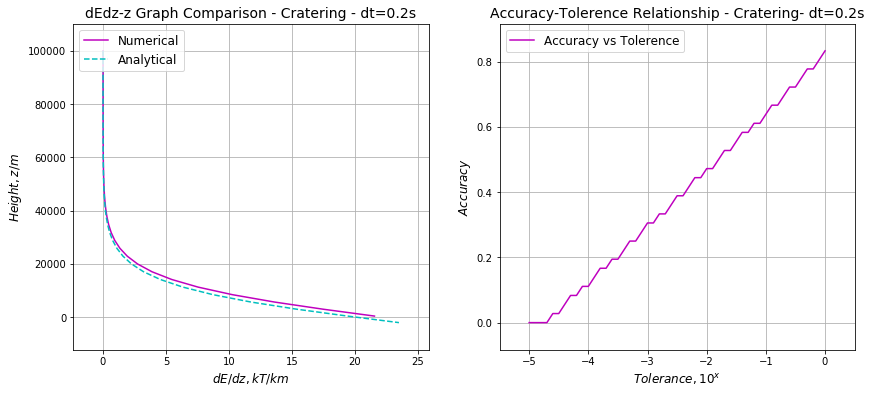

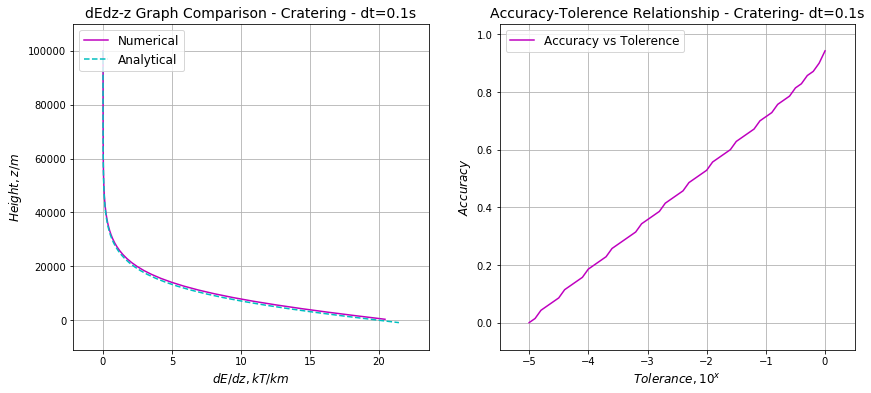

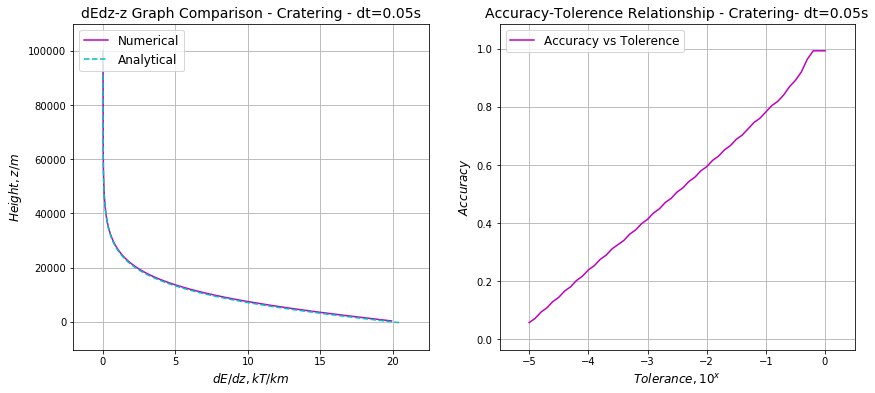

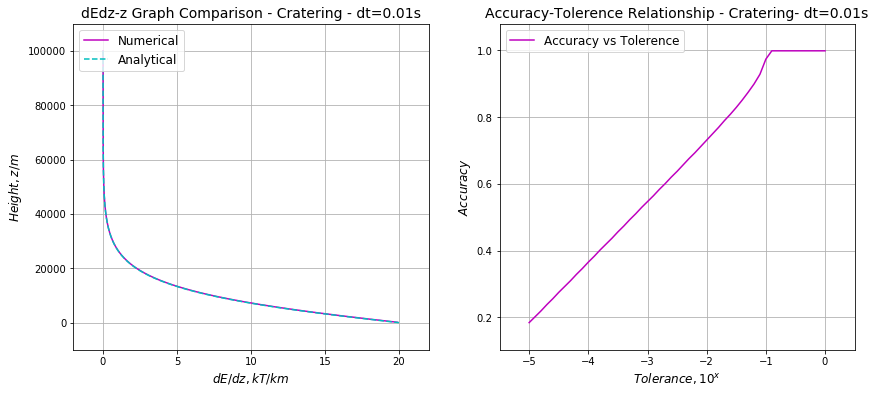

In [34]:
dtlist=[0.2,0.1,0.05,0.01]
for dtt in dtlist:
    #print('dt=',dtt)
    comparison_crater = solver.Planet(atmos_func='exponential',atmos_filename="../data/AltitudeDensityTable.csv",
                                      Cd=1., Ch=0, Q=2, Cl=0, alpha=0, Rp=np.inf, g=0, H=8000., rho0=1.2)
    df_cratering = comparison_crater.solve_atmospheric_entry(radius=10, velocity=21000, density=3000, strength=1e6, angle=45,
                                   init_altitude=100e3, dt=dtt, radians=False)
    df_cratering2 = comparison_crater.calculate_energy(df_cratering)
    dfca=np.array(df_cratering2.altitude)
    dfcdedz=comparison_crater.dedz(10,21000,3000,1e5,45,dfca)
#dfcdvdz
    
    fig, (ax, ax1) = plt.subplots(1,2, figsize=(14,6))
    ax.set_xlabel('$dE/dz, kT/km$', fontsize=12)
    ax.set_ylabel('$Height, z/m$', fontsize=12)
    ax.grid(True)
    ax.margins(0.1)
    ax.plot(df_cratering2.dedz, dfca,'m',label='Numerical')
    ax.plot(dfcdedz, dfca,'c--',label='Analytical')
    ax.set_title('dEdz-z Graph Comparison - Cratering - dt='+str(dtt)+'s', fontsize=14)
    ax.legend(loc='upper left', fontsize=12)

    
    accuracylist=[]
    ilist=[]
    for i in range(0,51):
        nooftrue=0
        ilist.append(-0.1*i)
        temp=np.isclose(df_cratering2.dedz,dfcdedz,atol=10**(-0.1*i))
        for k in range(len(dfcdedz)):
            nooftrue+=int(temp[k])
        accuracylist.append(nooftrue/len(dfcdedz))
    #print(ilist,accuracylist)
    #fig1, ax1 = plt.subplots(1,1, figsize=(10,8))
    ax1.set_xlabel('$Tolerance, 10^{x}$', fontsize=12)
    ax1.set_ylabel('$Accuracy$', fontsize=12)
    ax1.grid(True)
    ax1.margins(0.1)
    ax1.plot(ilist, accuracylist,'m',label='Accuracy vs Tolerence')
#ax.plot(dfadedz, dfaa,'c--',label='Analytical')
    ax1.set_title('Accuracy-Tolerence Relationship - Cratering - dt='+str(dtt)+'s', fontsize=14)
    ax1.legend(loc='upper left', fontsize=12)

    fig.show()

BEST TRY: dt=0.01, tolerence=1e-1

Situation 2: Airburst
r=8m
v0=19000m/s
rho=2000kg/m3
angle=2 degrees

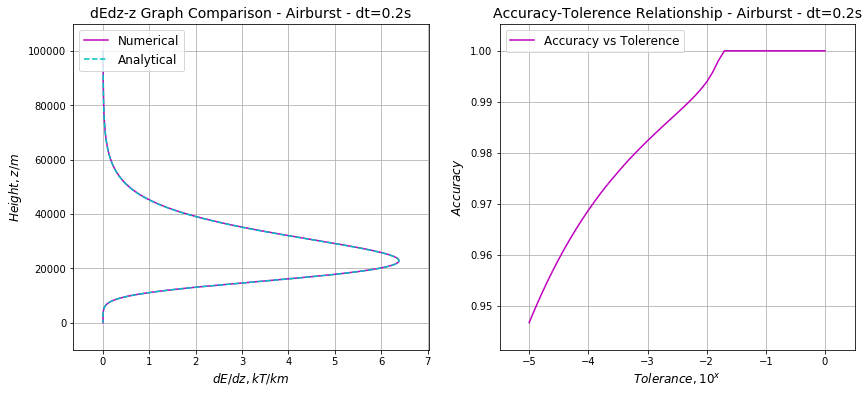

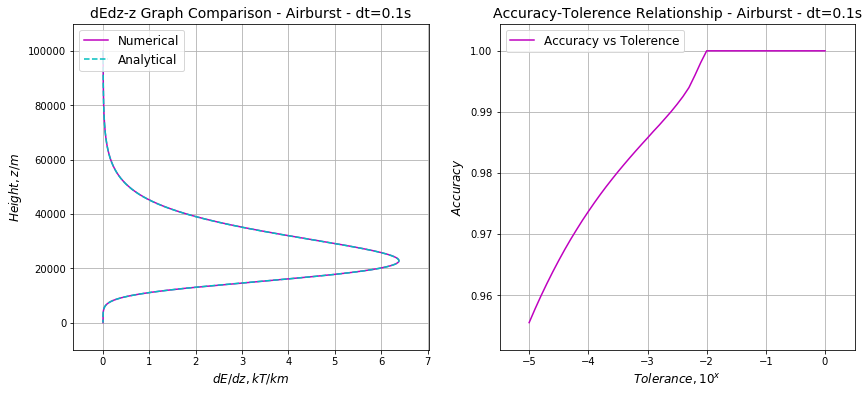

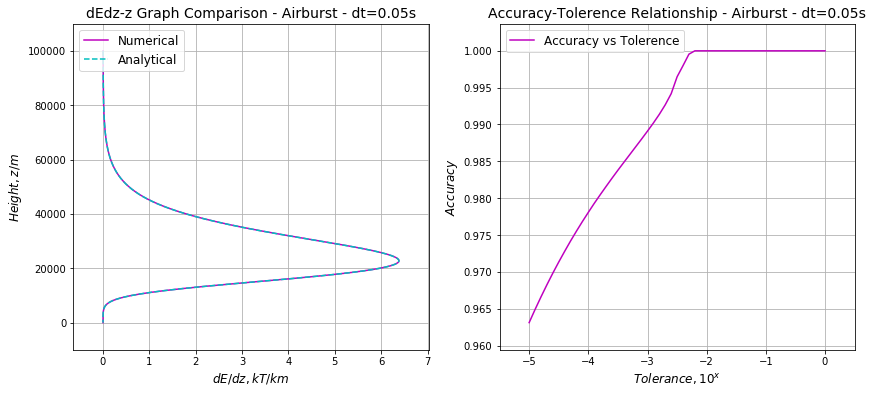

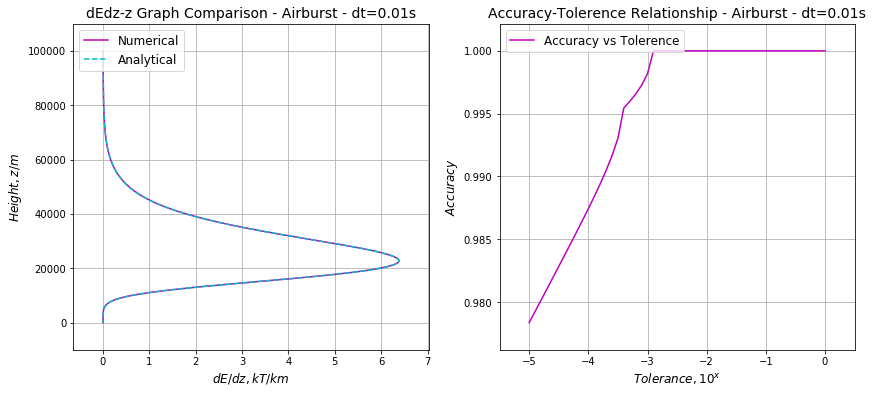

In [38]:
dtlist=[0.2,0.1,0.05,0.01]
for dtt in dtlist:
    #print('dt=',dtt)
    comparison_airburst = solver.Planet(atmos_func='exponential',Cd=1., Ch=0, Q=2, Cl=0, alpha=0, Rp=np.inf,\
                             g=0, H=8000., rho0=1.2)
    df_airburst = comparison_airburst.solve_atmospheric_entry(radius=8, velocity=19000, density=1500, strength=1e6, angle=2,\
                                   init_altitude=100e3, dt=dtt, radians=False)
    df_airburst2 = comparison_airburst.calculate_energy(df_airburst)
    dfaa=np.array(df_airburst2.altitude)
    dfadedz=comparison_airburst.dedz(8,19000,1500,1e6,2,dfaa)
#dfcdvdz
    
    fig, (ax, ax1) = plt.subplots(1,2, figsize=(14,6))
    ax.set_xlabel('$dE/dz, kT/km$', fontsize=12)
    ax.set_ylabel('$Height, z/m$', fontsize=12)
    ax.grid(True)
    ax.margins(0.1)
    ax.plot(df_airburst2.dedz, dfaa,'m',label='Numerical')
    ax.plot(dfadedz, dfaa,'c--',label='Analytical')
    ax.set_title('dEdz-z Graph Comparison - Airburst - dt='+str(dtt)+'s', fontsize=14)
    ax.legend(loc='upper left', fontsize=12)

    
    accuracylist=[]
    ilist=[]
    for i in range(0,51):
        nooftrue=0
        ilist.append(-0.1*i)
        temp=np.isclose(df_airburst2.dedz,dfadedz,atol=10**(-0.1*i))
        for k in range(len(dfadedz)):
            nooftrue+=int(temp[k])
        accuracylist.append(nooftrue/len(dfadedz))
    #print(ilist,accuracylist)
    #fig1, ax1 = plt.subplots(1,1, figsize=(10,8))
    ax1.set_xlabel('$Tolerance, 10^{x}$', fontsize=12)
    ax1.set_ylabel('$Accuracy$', fontsize=12)
    ax1.grid(True)
    ax1.margins(0.1)
    ax1.plot(ilist, accuracylist,'m',label='Accuracy vs Tolerence')
#ax.plot(dfadedz, dfaa,'c--',label='Analytical')
    ax1.set_title('Accuracy-Tolerence Relationship - Airburst - dt='+str(dtt)+'s', fontsize=14)
    ax1.legend(loc='upper left', fontsize=12)

    fig.show()

BEST TRY: dt=0.01, tolerence=1e-3